In [149]:
from model import Dense
from losses.MeanSquaredError import MSE
from utils import sliding_window, plot_curve_fitting, plot_regression
from model import compile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [150]:
path = 'data\\ECG Datasets.xlsx'
x=pd.read_excel(path, header=None).to_numpy()[1:].astype('float32')

In [151]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
data = sliding_window(x, 12)
X = data[:, :6]
Y = data[:,[4, 11]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

In [152]:
layer0 = Dense(input_size=6, output_size=12)
layer1 = Dense(input_size=12, output_size=6)
layer2 = Dense(input_size=6, output_size=4)
layer3 = Dense(input_size=4, output_size=2, activation='linear', weights_init_method='uniform', weights_uniform_range=(0.0,1.0))
model = compile([layer0, layer1, layer2, layer3])
model.summary()


 ****************************** model summary ****************************** 

layer 1:
	<class 'layers.Dense.Dense_network.Dense'>
	activation function: relu
	batch size: 32
	input size: 6
	output size: 12
	number of parameters: 84
	number of trainable parameters: 84
	number of non trainable parameters: 0
	--------------------------------------------------
layer 2:
	<class 'layers.Dense.Dense_network.Dense'>
	activation function: relu
	batch size: 32
	input size: 12
	output size: 6
	number of parameters: 78
	number of trainable parameters: 78
	number of non trainable parameters: 0
	--------------------------------------------------
layer 3:
	<class 'layers.Dense.Dense_network.Dense'>
	activation function: relu
	batch size: 32
	input size: 6
	output size: 4
	number of parameters: 28
	number of trainable parameters: 28
	number of non trainable parameters: 0
	--------------------------------------------------
layer 4:
	<class 'layers.Dense.Dense_network.Dense'>
	activation function: lin

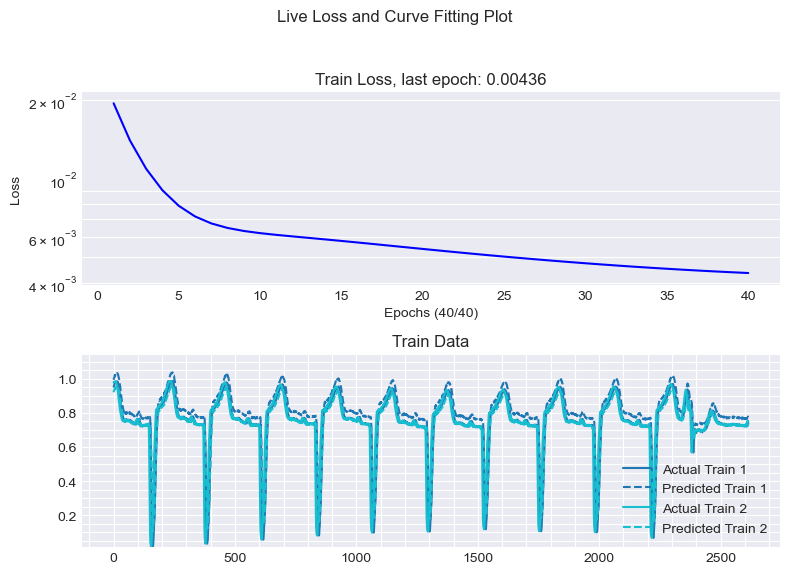

In [153]:
history = model.fit(X_train, Y_train, MSE(), epoch=40, shuffle=False, method='RMSprop',
                    learning_rate=1e-3,
                    plot_fitting=True, batch_size=4, fig_size=(8,6))

Test MSE is 0.00523


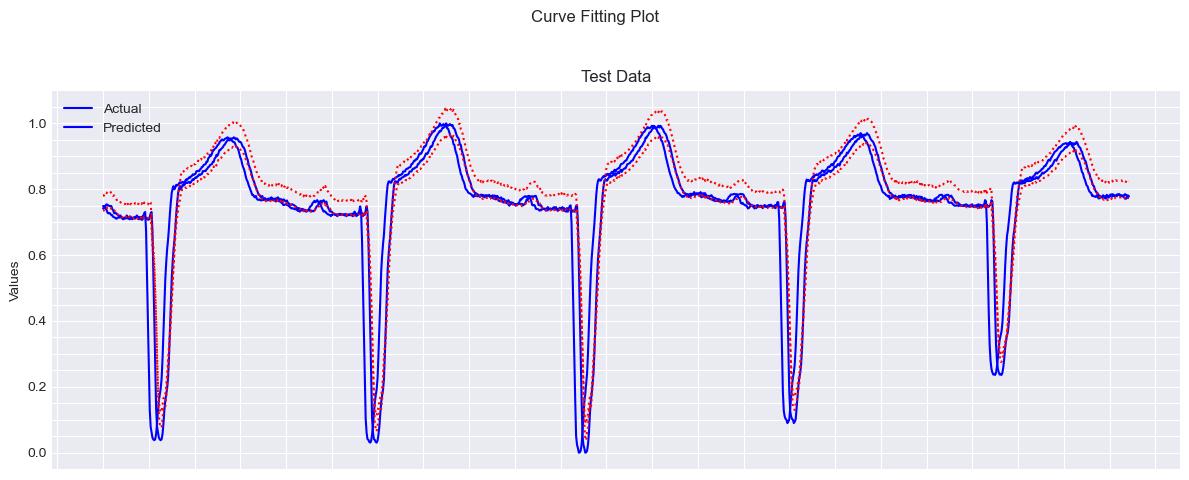

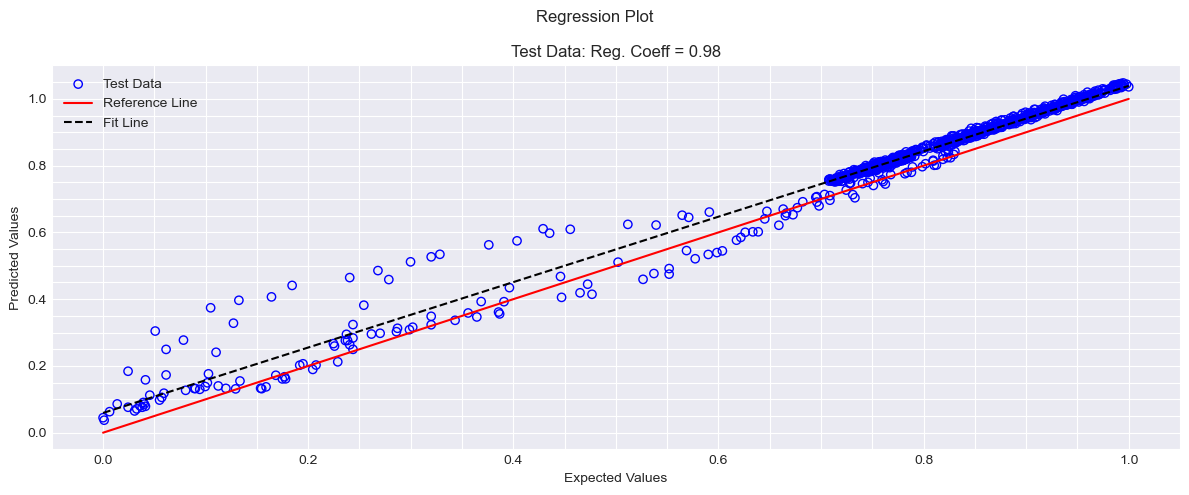

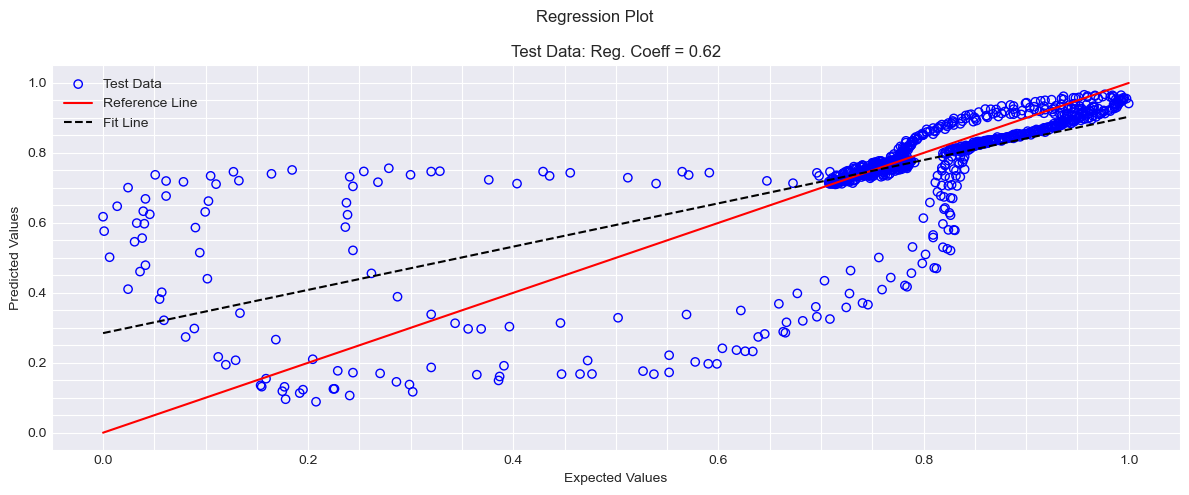

In [154]:
Y_test_predicted = model(X_test)
mse = MSE().forward(Y_test_predicted, Y_test)
print(f'Test MSE is {mse:.5f}')
plot_curve_fitting(Y_test, Y_test_predicted)
plot_regression(Y_test[:,0], Y_test_predicted[:,0])
plot_regression(Y_test[:,1], Y_test_predicted[:,1])

In [9]:
layer0 = Dense(input_size=4, output_size=3)
layer2 = Dense(input_size=3, output_size=2, activation='linear')
model = compile([layer0, layer2])
model.summary()


 ****************************** model summary ****************************** 

layer 1:
	<class 'layers.Dense.Dense_network.Dense'>
	activation function: relu
	batch size: 32
	input size: 4
	output size: 3
	number of parameters: 15
	number of trainable parameters: 15
	number of non trainable parameters: 0
	--------------------------------------------------
layer 2:
	<class 'layers.Dense.Dense_network.Dense'>
	activation function: linear
	batch size: 32
	input size: 3
	output size: 2
	number of parameters: 8
	number of trainable parameters: 8
	number of non trainable parameters: 0
	--------------------------------------------------
total number of parameters: 23
	total number of trainable parameters: 23
	total number of non trainable parameters: 0
	

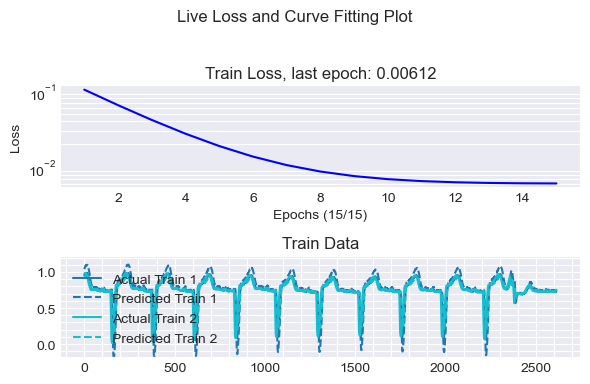

In [10]:
history = model.EKF(X_train, Y_train, MSE(), epoch=15, fig_size=(6,4), plot_fitting=True, learning_rate=1e-4)

Test MSE is 0.00738


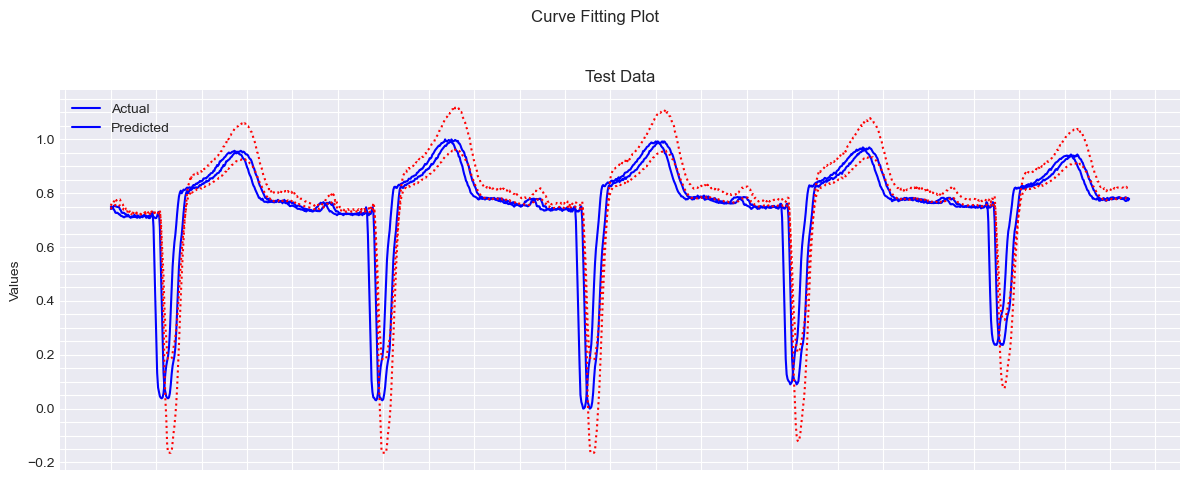

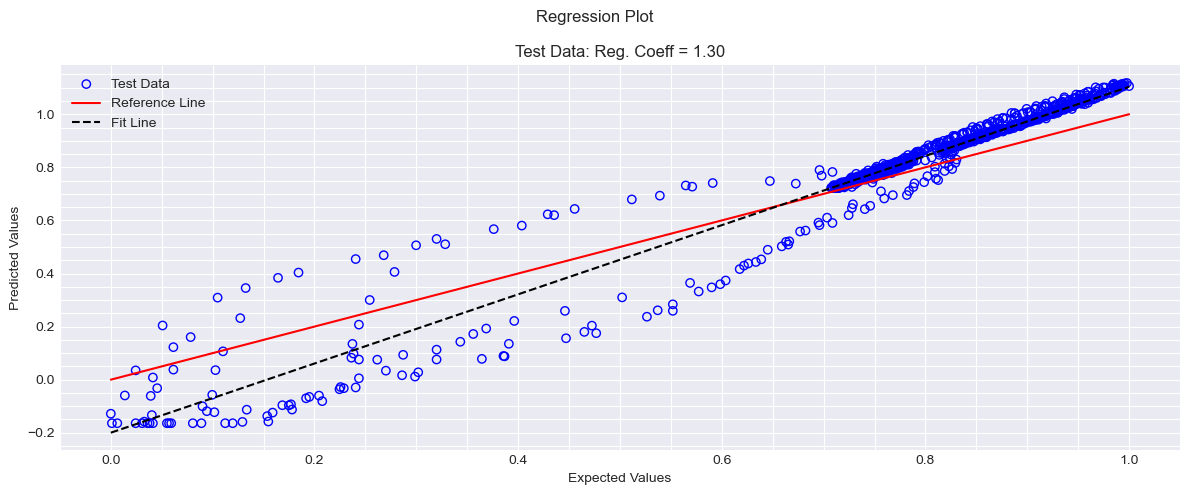

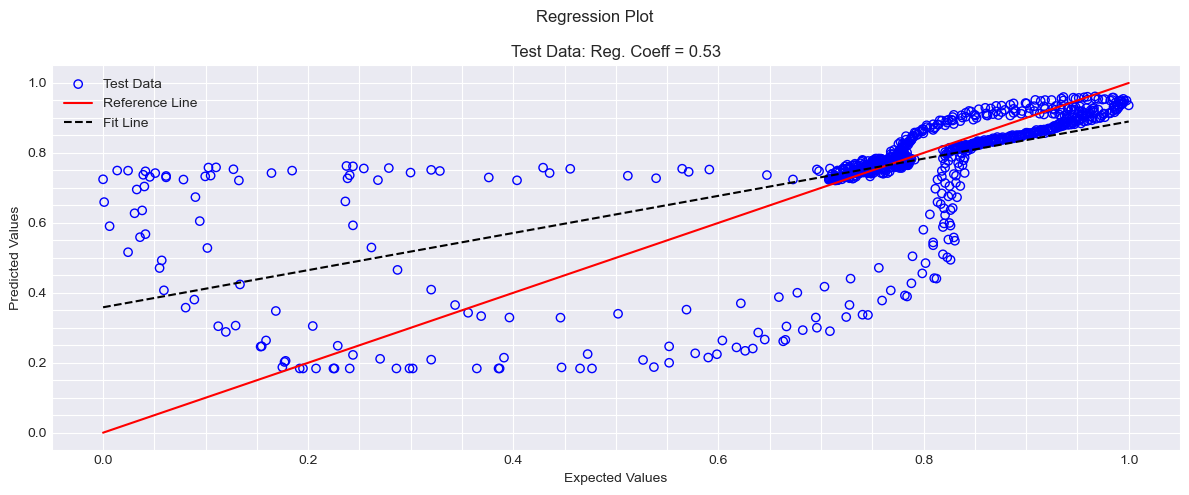

In [11]:
Y_test_predicted = model(X_test)
mse = MSE().forward(Y_test_predicted, Y_test)
print(f'Test MSE is {mse:.5f}')
plot_curve_fitting(Y_test, Y_test_predicted)
plot_regression(Y_test[:,0], Y_test_predicted[:,0])
plot_regression(Y_test[:,1], Y_test_predicted[:,1])